In [2]:
#%%imports
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

import importlib

plt.style.use('astroLuSt.styles.LuSt_style')


from astroLuSt.ai import metrics as alam



# Multi Confusion-Matrix

Generate a dummy dataset

In [3]:
import copy

y_true = [
    np.array([0]*20+[1]*40+[2]*20),
    np.array([0]*60+[1]*20+[2]*30),
    np.array([0]*10+[1]*10+[2]*10),
]
y_pred = copy.deepcopy(y_true)


#add wrong classifications (confusion)
y_pred[0][0:3]      = 1
y_pred[0][3:10]     = 2
y_pred[0][20:30]    = 0
y_pred[0][30:32]    = 2
y_pred[0][60:65]    = 0
y_pred[0][65:70]    = 1
y_pred[1][0:30]     = 1
y_pred[1][30:35]    = 2
y_pred[1][60:62]    = 0
y_pred[1][62:78]    = 2
y_pred[1][80:81]    = 0
y_pred[1][81:83]    = 1
y_pred[2][0:1]      = 1
y_pred[2][1:1]      = 2
y_pred[2][10:20]    = 0
y_pred[2][20:20]    = 2
y_pred[2][20:25]    = 0
y_pred[2][25:29]    = 1

#add classes not present in y_true
y_pred[0][-3:] = 4


print(len(y_true))
print(y_true[0].shape, y_true[2].shape)

print([np.unique(yi) for yi in y_pred])
# #plot labels
# for yt, yp in zip(y_true, y_pred): plt.plot(yt-yp)


3
(80,) (30,)
[array([0, 1, 2, 4]), array([0, 1, 2]), array([0, 1, 2])]


Calculate Multi-Confusion-Matrix

In [11]:
importlib.reload(alam)

MCM = alam.MultiConfusionMatrix(
    score_decimals=2,
    text_colors=None,
    cmap='nipy_spectral', vmin=None, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs=None
)

multi_confmat = MCM.get_multi_confmat(
    y_true=y_true, y_pred=y_pred,
    sample_weight=None, normalize=None,
    verbose=0
)

Display Multi-Confusion-Matrix.
(Automatically determine how to display)

MultiConfusionMatrix(
    score_decimals=2,
    cmap='nipy_spectral', vmin=None, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs={'figsize': (9, 9)},
)


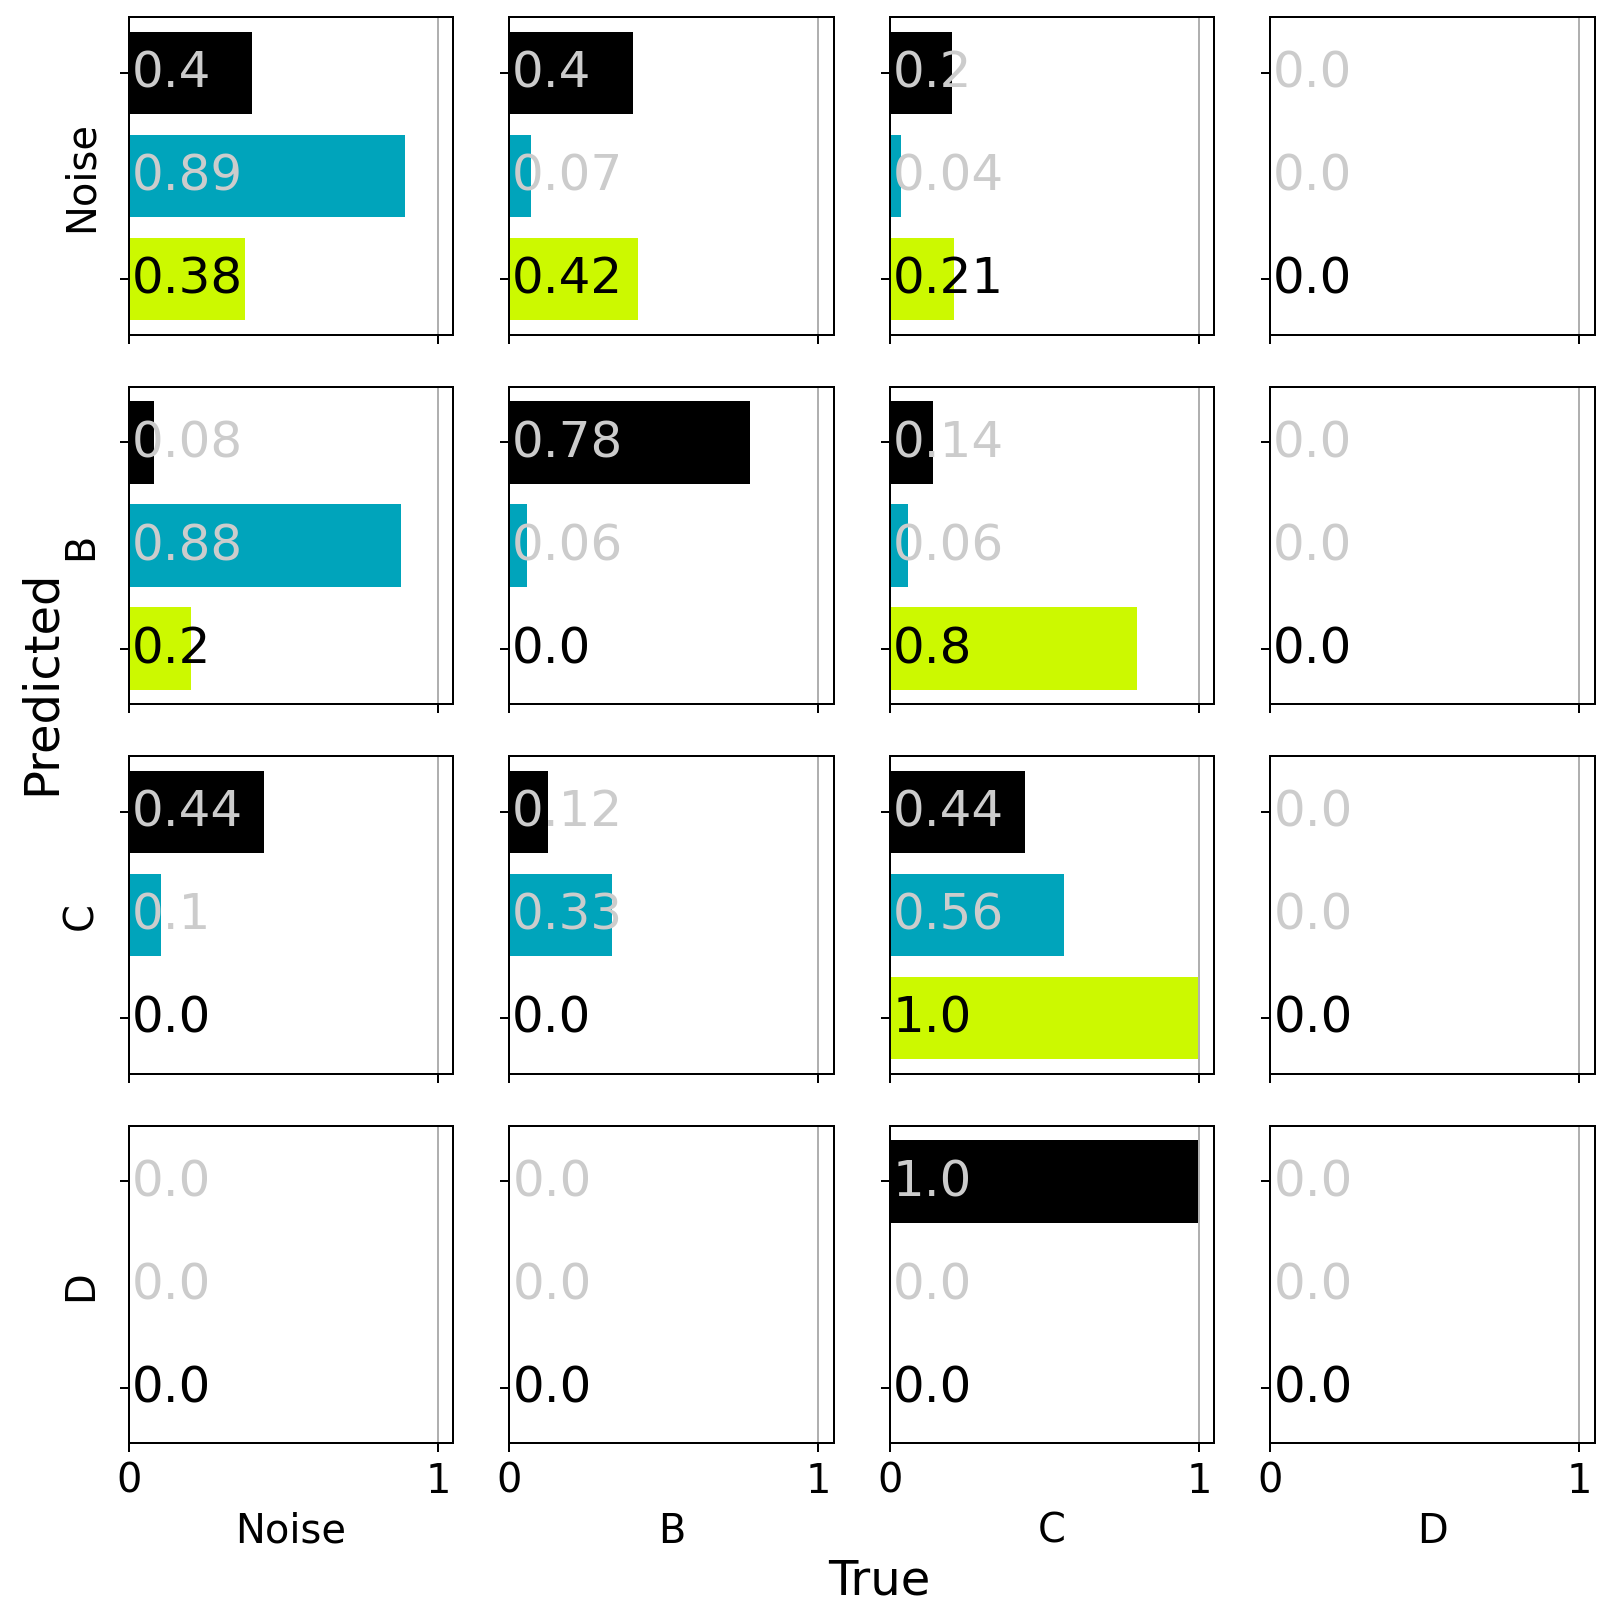

In [16]:
importlib.reload(alam)


MCM = alam.MultiConfusionMatrix(
    score_decimals=2,
    text_colors=None,
    cmap='nipy_spectral', vmin=None, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs=None
)
print(MCM)

fig, axs = MCM.plot_result(
    y_true, y_pred,
    labels=['Noise', 'B', 'C', 'D'],
    normalize='pred',
    plot_func='auto',
    plot_multimodel_kwargs=dict(
        # text_colors='g',
        m_labels='score',
        text_kwargs={'fontsize':20}
    ),
)


plt.show()

Force to plot single model

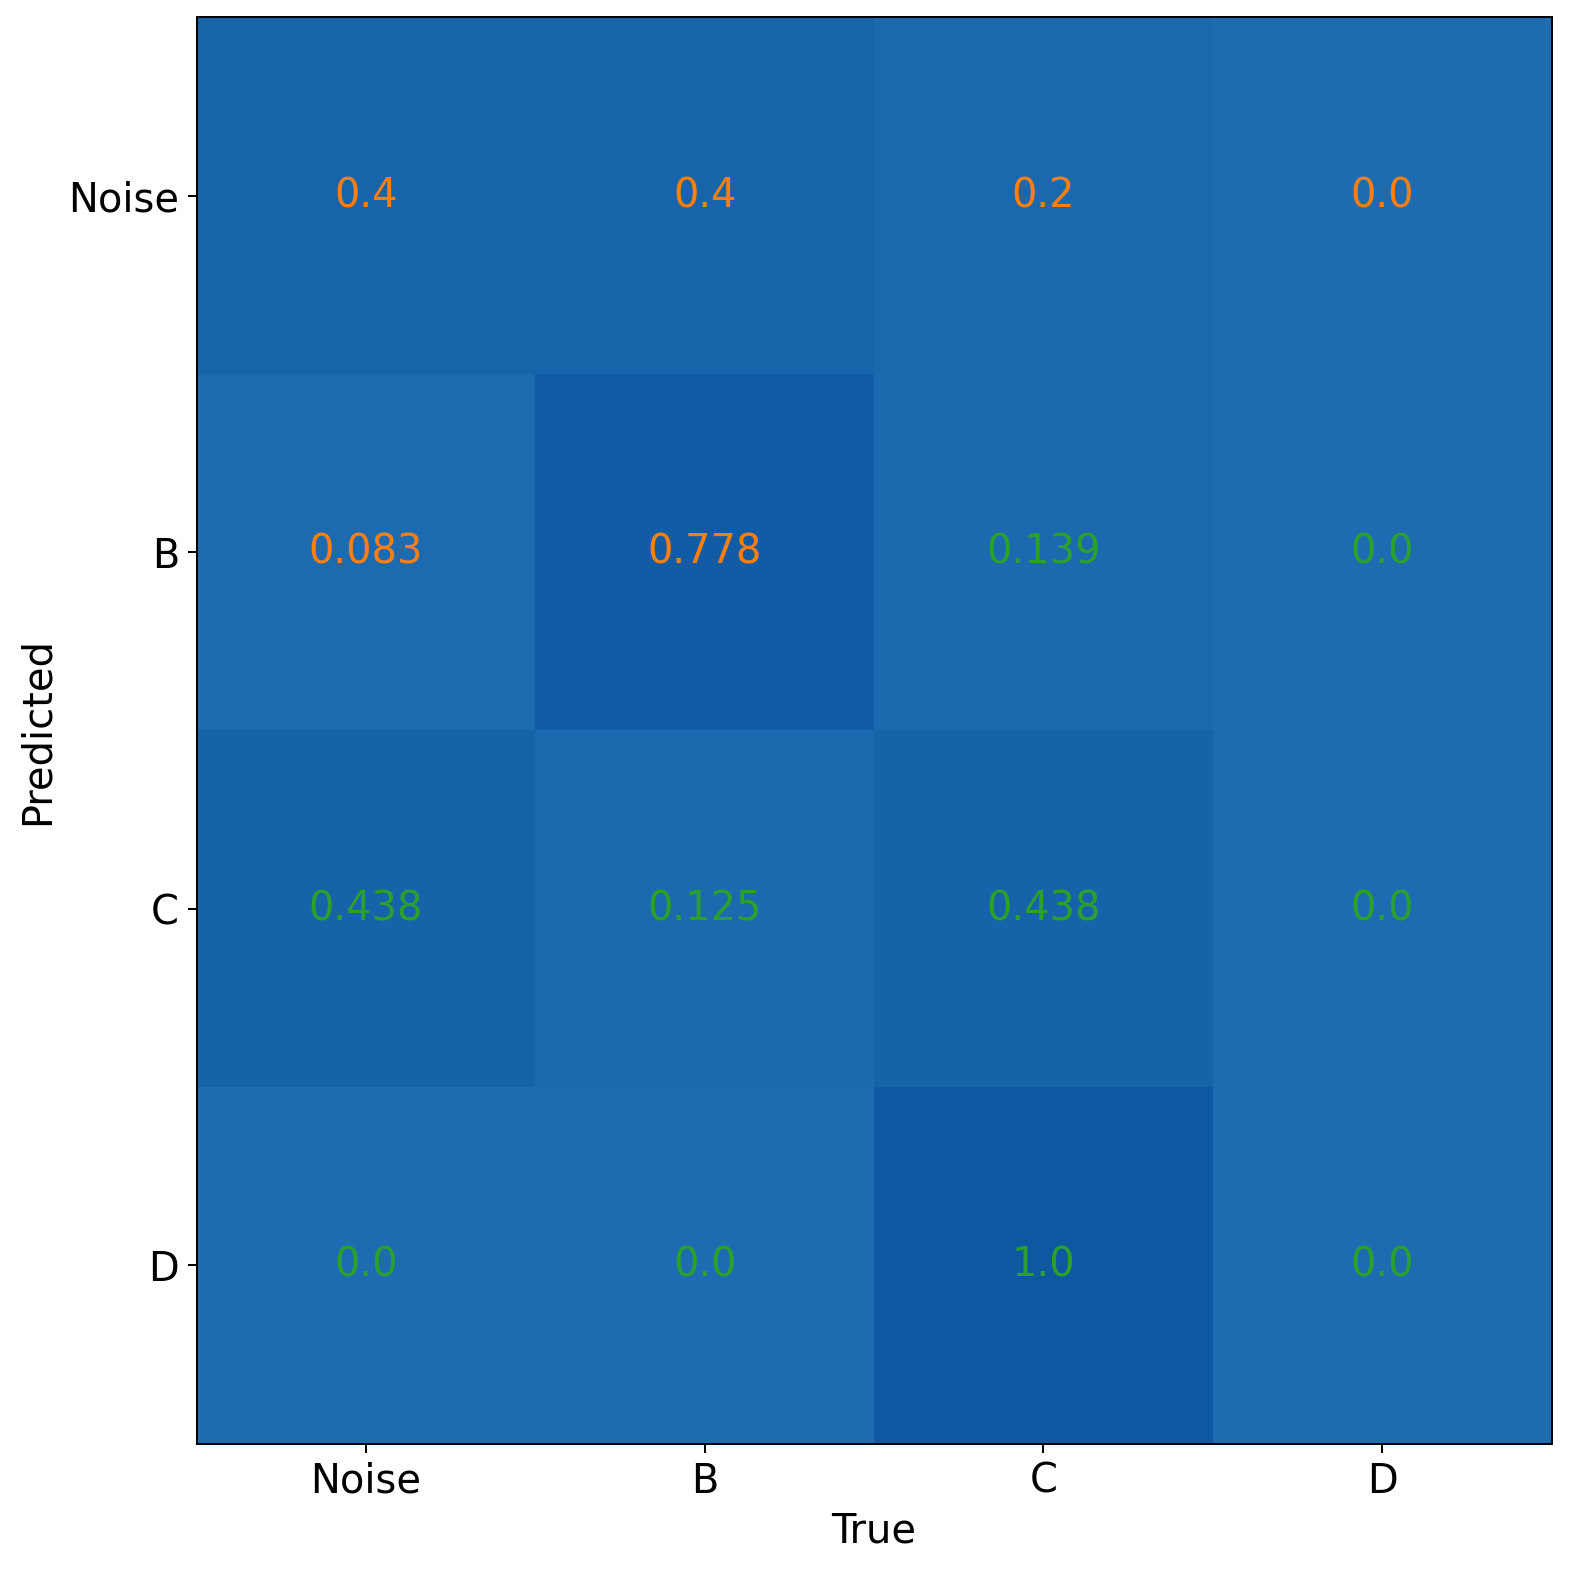

In [10]:
fig, axs = MCM.plot_result(
    y_true, y_pred,
    labels=['Noise', 'B', 'C', 'D', '?'],
    normalize='pred',
    plot_func='single',
    plot_singlemodel_kwargs=dict(
        score_decimals=3,
        text_colors=['tab:orange']*6+['tab:green']*10,
        cmap='Blues', vmin=-10, vmax=3,
        pcolormesh_kwargs={'alpha':1.0},
    ),
)


plt.show()